In [1]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [3]:
X_w,y_w = mglearn.datasets.make_wave(n_samples = 40)
X_w,y_w

(array([[-0.75275929],
        [ 2.70428584],
        [ 1.39196365],
        [ 0.59195091],
        [-2.06388816],
        [-2.06403288],
        [-2.65149833],
        [ 2.19705687],
        [ 0.60669007],
        [ 1.24843547],
        [-2.87649303],
        [ 2.81945911],
        [ 1.99465584],
        [-1.72596534],
        [-1.9090502 ],
        [-1.89957294],
        [-1.17454654],
        [ 0.14853859],
        [-0.40832989],
        [-1.25262516],
        [ 0.67111737],
        [-2.16303684],
        [-1.24713211],
        [-0.80182894],
        [-0.26358009],
        [ 1.71105577],
        [-1.80195731],
        [ 0.08540663],
        [ 0.55448741],
        [-2.72129752],
        [ 0.64526911],
        [-1.97685526],
        [-2.60969044],
        [ 2.69331322],
        [ 2.7937922 ],
        [ 1.85038409],
        [-1.17231738],
        [-2.41396732],
        [ 1.10539816],
        [-0.35908504]]),
 array([-0.44822073,  0.33122576,  0.77932073,  0.03497884, -1.38773632,
     

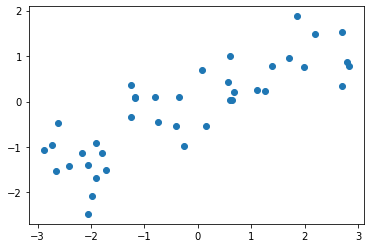

In [4]:
plt.plot(X_w,y_w,'o')

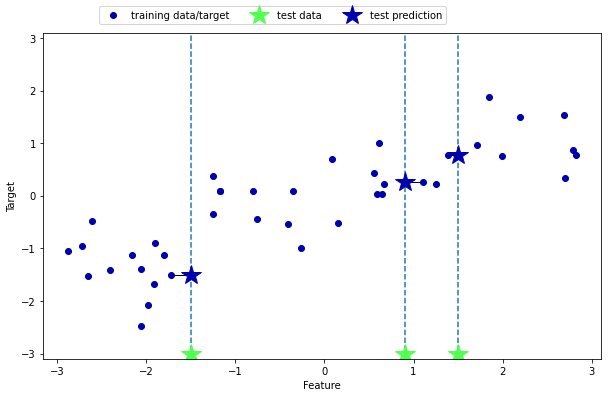

In [5]:
# 이웃 = 1 로 예측
mglearn.plots.plot_knn_regression(n_neighbors=1)

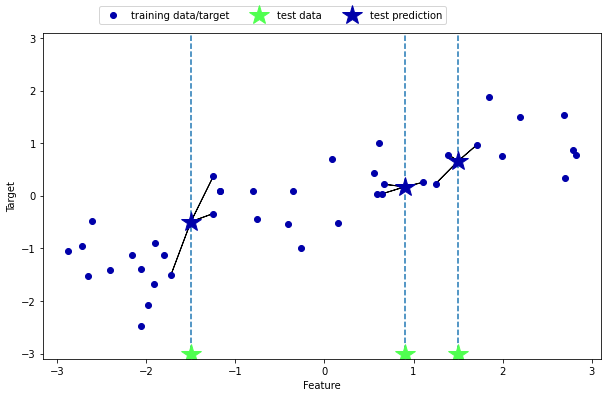

In [6]:
# 이웃 = 3 로 예측
mglearn.plots.plot_knn_regression(n_neighbors=3)

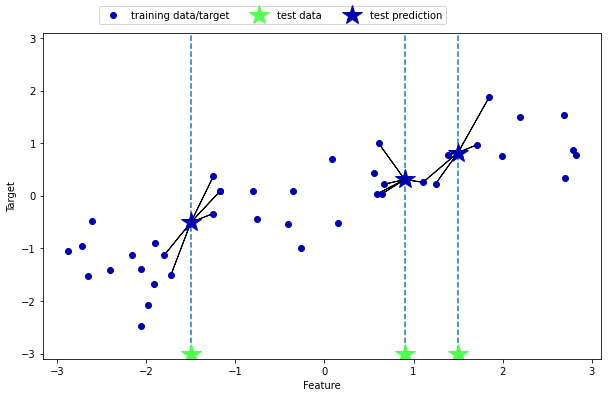

In [7]:
# 이웃 = 5 로 예측
mglearn.plots.plot_knn_regression(n_neighbors=5)

In [8]:
# wave 데이터셋을 트레인셋과 테스트셋으로 나눕니다.
X_w_train,X_w_test,y_w_train,y_w_test = train_test_split(X_w,y_w,random_state = 0)

# 이웃의 수를 3으로 하여 모델의 객체를 생성
knn_reg = KNeighborsRegressor(n_neighbors = 3)

# train 데이터와 target 데이터를 사용하여 모델을 학습시킨다.
knn_reg.fit(X_w_train,y_w_train)

KNeighborsRegressor(n_neighbors=3)

In [10]:
knn_reg.predict(X_w_test)

array([-0.05396539,  0.35686046,  1.13671923, -1.89415682, -1.13881398,
       -1.63113382,  0.35686046,  0.91241374, -0.44680446, -1.13881398])

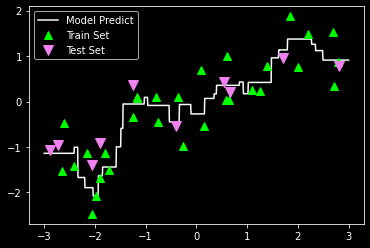

In [14]:
# 시각화
# 검정 배경
plt.style.use('dark_background')

# -3과 3 사이에 1000개의 데이터 포인트를 만듭니다.
line = np.linspace(-3,3,1000).reshape(-1,1)

# 모델링 결과
plt.plot(line, knn_reg.predict(line),c='mintcream')
plt.plot(X_w_train,y_w_train,'^',c='lime',markersize=8)
plt.plot(X_w_test,y_w_test,'v',c='violet',markersize=10)
plt.legend(["Model Predict","Train Set","Test Set"], loc = "best")

In [13]:
# R_square 모델 성능 평가
knn_reg.score(X_w_test,y_w_test)

0.8344172446249605

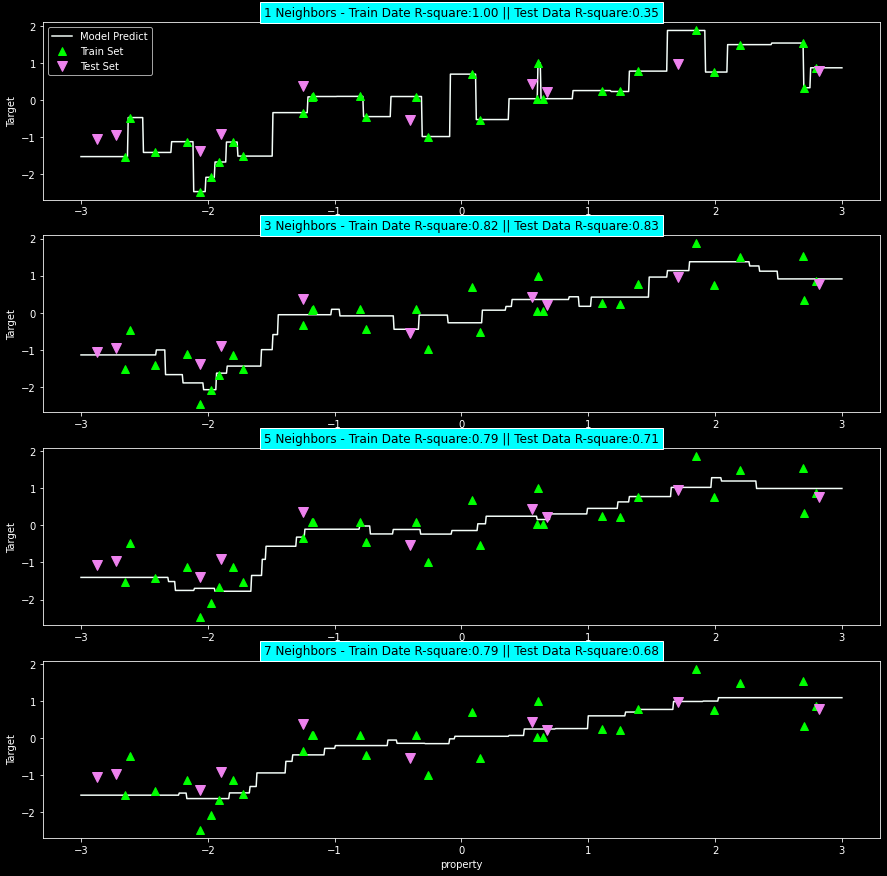

In [19]:
fig, axes = plt.subplots(4,1,figsize = (15,15))
line = np.linspace(-3,3,1000).reshape(-1,1)

for n_neighbors, ax in zip([1,3,5,7], axes):
    # 1,3,5,7개 이웃을 사용한 KNN 회귀
    knn_reg_wave = KNeighborsRegressor(n_neighbors = n_neighbors)
    knn_reg_wave.fit(X_w_train,y_w_train)
    # train, test 산점도, KNN 회귀선
    ax.plot(line,knn_reg_wave.predict(line),c = 'mintcream')
    ax.plot(X_w_train,y_w_train,'^',c='lime',markersize = 8)
    ax.plot(X_w_test,y_w_test,'v',c='violet',markersize = 10)
    
    ax.set_title(
        "{} Neighbors - Train Date R-square:{:.2f} || Test Data R-square:{:.2f}".format(
        n_neighbors, knn_reg_wave.score(X_w_train,y_w_train),knn_reg_wave.score(X_w_test,y_w_test)
        ),bbox = dict(facecolor = 'cyan'),fontdict = {'size':12,'color':'black'} )
    ax.set_xlabel("property")
    ax.set_ylabel("Target")
axes[0].legend(["Model Predict","Train Set","Test Set"], loc = "best")